In [12]:
#Importing libraries# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [14]:
#Loading the dataset
df = pd.read_csv(r"DG_preprocessing.csv")
df.head()

,label,full_text,digit
0,False,abortion says annies list political group supp...,0
1,True,energy history job accomplishments decline coa...,1
2,True,foreign policy hillary clinton agrees john mcc...,1
3,True,education chicago bears starting quarterbacks ...,1
4,True,ethics m person stage worked actively just las...,1


In [15]:
df.isnull().sum()

label        0
full_text    0
digit        0
dtype: int64

In [16]:
unique_labels = df['label'].unique()
unique_digits = df['digit'].unique()
print(unique_labels)
print(unique_digits)

[False  True]
[0 1]


In [17]:
#Performing text vectorization
Vectorizer = TfidfVectorizer()
X = Vectorizer.fit_transform(df['full_text'])
y = df['digit']

In [18]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 5)

In [19]:
KNNModel = KNeighborsClassifier(n_neighbors=3)  
KNNModel.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [20]:
Y_Pred = KNNModel.predict(X_test)

In [21]:
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support

print("Classification Report:")
report = classification_report(y_test, Y_Pred, target_names=['fake', 'real'])
print(report)

accuracy = accuracy_score(y_test, Y_Pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, Y_Pred, average=None)

print("Precision (Fake): {:.2f}%".format(precision[0] * 100))
print("Precision (Real): {:.2f}%".format(precision[1] * 100))
print("Recall (Fake): {:.2f}%".format(recall[0] * 100))
print("Recall (Real): {:.2f}%".format(recall[1] * 100))
print("F1-Score (Fake): {:.2f}%".format(f1_score[0] * 100))
print("F1-Score (Real): {:.2f}%".format(f1_score[1] * 100))

ConfMatrix = confusion_matrix(y_test, Y_Pred)
print("Confusion Matrix:")
print(ConfMatrix)

Classification Report:
              precision    recall  f1-score   support

        fake       0.86      0.71      0.78      7878
        real       0.76      0.89      0.82      8334

    accuracy                           0.80     16212
   macro avg       0.81      0.80      0.80     16212
weighted avg       0.81      0.80      0.80     16212

Accuracy: 80.20%
Precision (Fake): 86.22%
Precision (Real): 76.23%
Recall (Fake): 70.53%
Recall (Real): 89.34%
F1-Score (Fake): 77.59%
F1-Score (Real): 82.27%
Confusion Matrix:
[[5556 2322]
 [ 888 7446]]


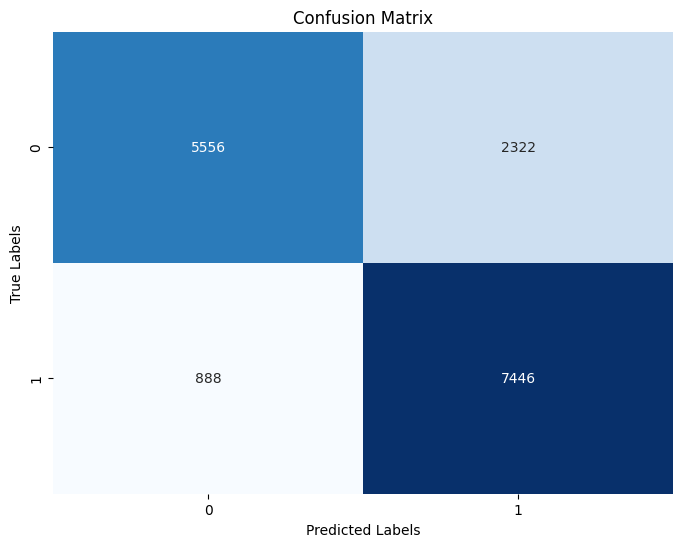

In [22]:
cm = confusion_matrix(y_test, Y_Pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

k = 3
Training Accuracy: 0.9021952855721853
Test Accuracy: 0.8007031828275352
-------------------
k = 5
Training Accuracy: 0.8688843137708483
Test Accuracy: 0.8002405625462621
-------------------
k = 7
Training Accuracy: 0.8557681186240718
Test Accuracy: 0.7986676535899334
-------------------
k = 9
Training Accuracy: 0.8469777232876079
Test Accuracy: 0.7975573649148778
-------------------


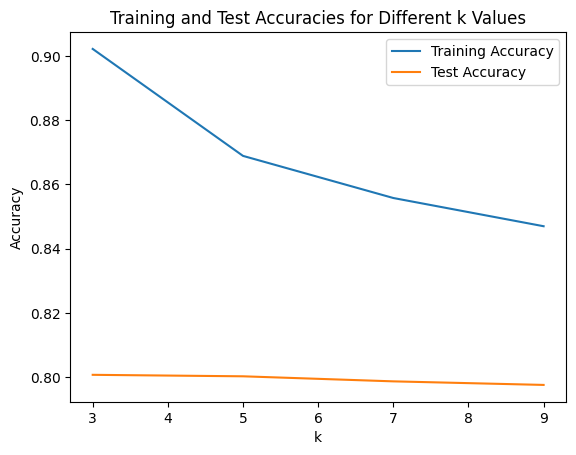

The model is overfitting.


In [12]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k_values = [3, 5, 7, 9]

train_accuracies = []
test_accuracies = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    train_accuracy = accuracy_score(y_train, knn_model.predict(X_train))
    train_accuracies.append(train_accuracy)

    test_accuracy = accuracy_score(y_test, knn_model.predict(X_test))
    test_accuracies.append(test_accuracy)

    print("k =", k)
    print("Training Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)
    print("-------------------")

# Plot the training and testing accuracies
plt.plot(k_values, train_accuracies, label='Training Accuracy')
plt.plot(k_values, test_accuracies, label='Test Accuracy')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracies for Different k Values')
plt.legend()
plt.show()

if max(train_accuracies) > max(test_accuracies):
    print("The model is overfitting.")
else:
    print("The model is not overfitting.")


## Manual Testing:

In [16]:
X_test = Vectorizer.transform(['candidates biography i m probably one of the four or five best known americans in the world 53 attorney republican '])
X_test2 = Vectorizer.transform(['health care the american people support defunding obamacare and oppose shutting down the government 35 u s senator republican '])
X_test3 = Vectorizer.transform(['veterans says hillary clinton said the veterans affairs scandal is over exaggerated she said she was satisfied with what was going on 49 president elect republican '])
X_test4 = Vectorizer.transform(['federal budget health care the american healthcare system burns 18 percent of our national gdp nobody else is close 127 u s senator democrat '])
X_test5 = Vectorizer.transform(['immigration says marco rubio is the one for an open border 176 candidate for u s senate and physician republican '])
X_test6 = Vectorizer.transform(['health care says any attempt to try to compare the massachusetts health care law with the federal health care law is completely intellectually dishonest governor romney did not raise one tax in doing what he did 135 governor of new jersey republican '])

# Make prediction
prediction = KNNModel.predict(X_test)
prediction2 = KNNModel.predict(X_test2)
prediction3 = KNNModel.predict(X_test3)
prediction4 = KNNModel.predict(X_test4)
prediction5 = KNNModel.predict(X_test5)
prediction6 = KNNModel.predict(X_test6)

print("The first statement prediction is: ",prediction)
print("The second statement prediction is: ",prediction2)
print("The second statement prediction is: ",prediction3)
print("The second statement prediction is: ",prediction4)
print("The second statement prediction is: ",prediction5)
print("The second statement prediction is: ",prediction6)

The first statement prediction is:  [1]
The second statement prediction is:  [0]
The second statement prediction is:  [1]
The second statement prediction is:  [0]
The second statement prediction is:  [1]
The second statement prediction is:  [0]


In [8]:
! pip install textblob

In [10]:
from textblob import TextBlob

new_statement = "health care the american people support defunding obamacare and oppose shutting down the government 35 u s senator republican "

blob = TextBlob(new_statement)
sentiment = blob.sentiment

polarity = sentiment.polarity
if polarity > 0:
    sentiment_label = "Positive"
elif polarity < 0:
    sentiment_label = "Negative"
else:
    sentiment_label = "Neutral"

print("Sentiment:", sentiment_label)


Sentiment: Negative
